### To distinguish presence (values 1,2,3,4 --> 1) from absence (value 0) of heart disease

#### Variables
* 1.	age – age of the patient
* 2.	sex – sex of the patient (1: male, 0: female)
* 3.	cp – chest pain type (4 values: 0, 1 ,2, 3)
* 4.	trtbps – resting blood pressure (in mm Hg on admission to the hospital)
* 5.	chol – serum cholesterol in mg/dl
* 6.	fbs – fasting blood sugar > 120mg/dl (2 values: 1 = yes, 0 = no)
* 7.	restecg – resting electrocardiographic results (3 values: 0 = normal, 1 = ST-T wave abnormality, 2 = probable or definite left ventricular hypertrophy)
* 8.	thalachh – maximum heart rate achieved
* 9.	exng – exercise induced angina (1 = yes, 0 = no)
* 10.	oldpeak – ST depression induced by exercise relative to rest
* 11.	slp – slope of the peak exercise ST segment 
* 12.	caa – number of major vessels colored by fluoroscopy (4 values: 0, 1, 2, 3)
* 13.	thall – values: 0 = normal, 1 = fixed defect, 2 = reversable defect
* 14.	output (target) – values: 0 = lower chance of heart attack, 1 = higher chance of heart attack

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Heart.csv")

In [3]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info() #no missing data, the categorical data has already been encoded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.isnull().sum() #to confirm no missing data

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
data.describe() #normalization needs to be done, based on the mean values

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Feature Selection

In [7]:
data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Text(0.5, 1.0, 'Correlation Heatmap')

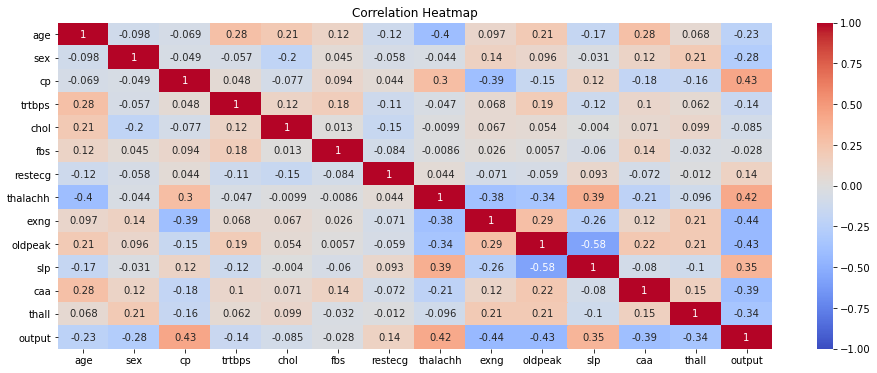

In [8]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap= 'coolwarm', annot=True)

heatmap.set_title('Correlation Heatmap')

Text(0.5, 1.0, 'Features correlating with the output')

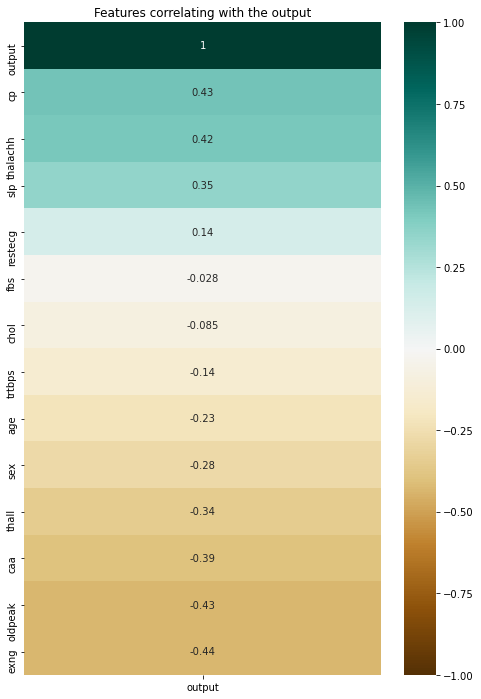

In [9]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['output']].sort_values(by='output', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Features correlating with the output')

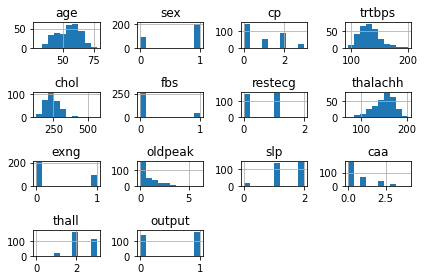

In [10]:
data.hist()
plt.tight_layout()

In [11]:
data['output'].value_counts() # to check whether the data is balanced

1    165
0    138
Name: output, dtype: int64

<AxesSubplot:xlabel='output', ylabel='count'>

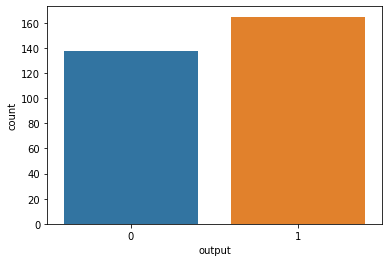

In [12]:
sns.countplot(x='output', data=data)

In [13]:
data.groupby('output').mean()

# females are at greater risk of heart disease, based on the sex column

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
output,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [14]:
data.groupby('sex').mean()

# indeed, the output for females (sex = 0) is higher than males (sex = 1)

,age,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
sex,,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.12500,0.572917,151.125000,0.229167,0.876042,1.427083,0.552083,2.125000,0.750000
1,53.758454,0.932367,130.946860,239.289855,0.15942,0.507246,148.961353,0.371981,1.115459,1.386473,0.811594,2.400966,0.449275


In [16]:
by_output = data.groupby('output')

by_output.get_group(1).head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Visualization - to better understand the variables

Text(0, 0.5, 'Occurrence of Heart Disease')

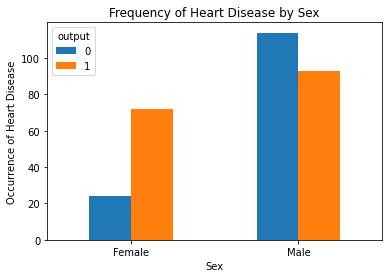

In [15]:
%matplotlib inline
pd.crosstab(data.sex,data.output).plot(kind='bar',rot=0)
plt.title('Frequency of Heart Disease by Sex')
plt.xlabel('Sex')
plt.xticks([0, 1], ['Female', 'Male'])
plt.ylabel('Occurrence of Heart Disease')

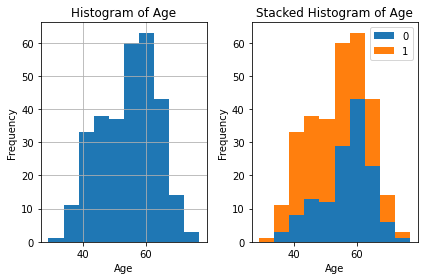

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2)

## Normal Histogram
plt.subplot(1, 2, 1) 
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

## Stacked Histogram
plt.subplot(1, 2, 2) 
age0 = by_output.get_group(0)
age1 = by_output.get_group(1)
plt.hist([age0.age, age1.age],stacked=True)
plt.title('Stacked Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(["0", "1"])

fig.tight_layout()

Text(0, 0.5, 'Occurrence of Heart Disease')

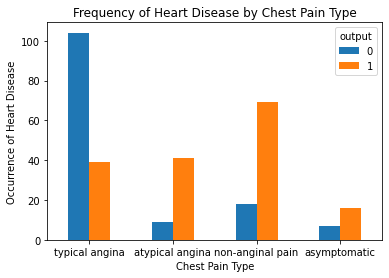

In [18]:
pd.crosstab(data.cp,data.output).plot(kind='bar',rot=0)
plt.title('Frequency of Heart Disease by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks([0,1,2,3], ['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.ylabel('Occurrence of Heart Disease')

# patients with atypical angina and non-anginal pain are of higher risk

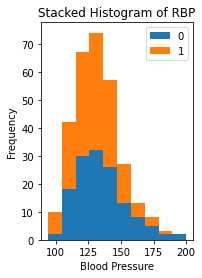

In [19]:
plt.subplot(1, 2, 2) 
bp0 = by_output.get_group(0)
bp1 = by_output.get_group(1)
plt.hist([bp0.trtbps, bp1.trtbps],stacked=True)
plt.title('Stacked Histogram of RBP')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.legend(["0", "1"])

# not much difference

Text(0, 0.5, 'Occurrence of Heart Disease')

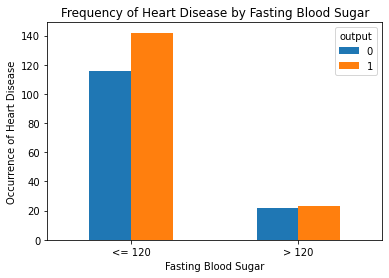

In [20]:
pd.crosstab(data.fbs,data.output).plot(kind='bar',rot=0)
plt.title('Frequency of Heart Disease by Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.xticks([0,1], ['<= 120','> 120'])
plt.ylabel('Occurrence of Heart Disease')

# fasting blood sugar does not seem to be indicative of heart disease
# but 120 is a relatively high benchmark

Text(0, 0.5, 'Occurrence of Heart Disease')

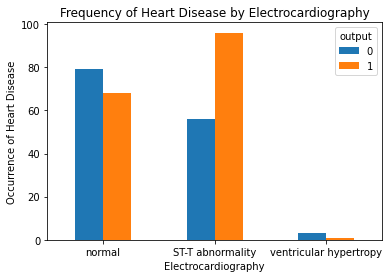

In [21]:
pd.crosstab(data.restecg,data.output).plot(kind='bar',rot=0)
plt.title('Frequency of Heart Disease by Electrocardiography')
plt.xlabel('Electrocardiography')
plt.xticks([0,1,2], ['normal','ST-T abnormality','ventricular hypertropy'])
plt.ylabel('Occurrence of Heart Disease')

# people with an abnormality have a higher risk of heart disease
# however, there is insufficient sample of patients with hypertropy

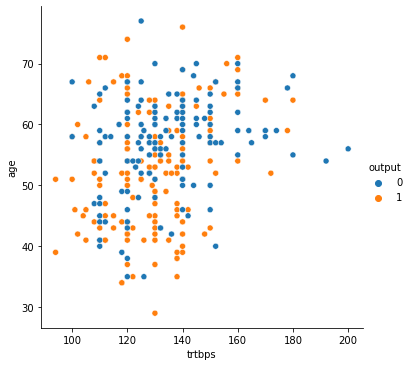

In [22]:
#sns.countplot(x="trtbps", hue="output", data=data) 
sns.relplot(x="trtbps", y="age", hue="output", data=data);
#there doesn't seem to be any pattern

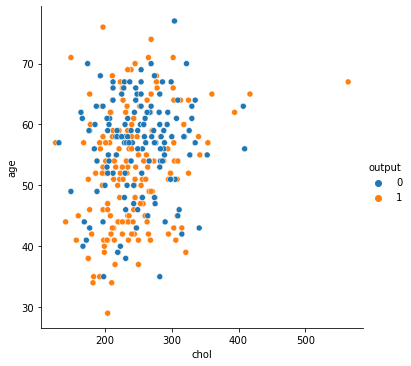

In [23]:
sns.relplot(x="chol", y="age", hue="output", data=data);
# younger patients with higher cholesterol are of higher risk? can't really tell

<AxesSubplot:xlabel='fbs', ylabel='output'>

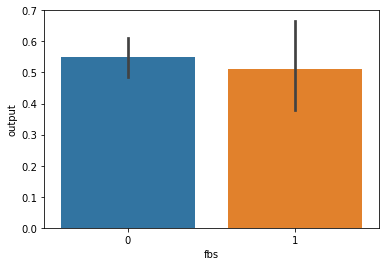

In [24]:
sns.barplot(x="fbs", y="output", data=data) #approximately the same

1    152
0    147
2      4
Name: restecg, dtype: int64


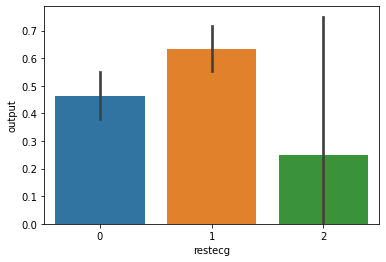

In [25]:
sns.barplot(x="restecg", y="output", data=data)

print(data['restecg'].value_counts()) # high error rate due to lack of values

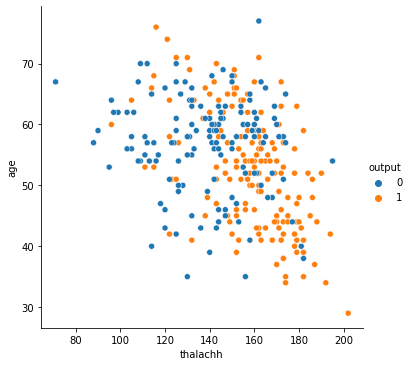

In [26]:
sns.relplot(x="thalachh", y="age", hue="output", data=data);
# risk increases as max heart rate achieved increases

Text(0, 0.5, 'Occurrence of Heart Disease')

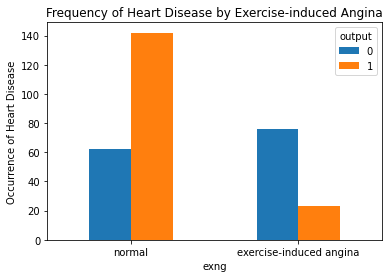

In [27]:
pd.crosstab(data.exng,data.output).plot(kind='bar',rot=0)
plt.title('Frequency of Heart Disease by Exercise-induced Angina')
plt.xlabel('exng')
plt.xticks([0,1], ['normal','exercise-induced angina'])
plt.ylabel('Occurrence of Heart Disease')

# exercise-induced chest pain does not correlate with risk of heart disease

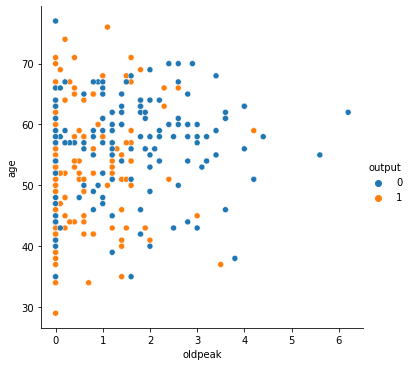

In [28]:
sns.relplot(x="oldpeak", y="age", hue="output", data=data);

# doesn't really seem to show much

Text(0, 0.5, 'Occurrence of Heart Disease')

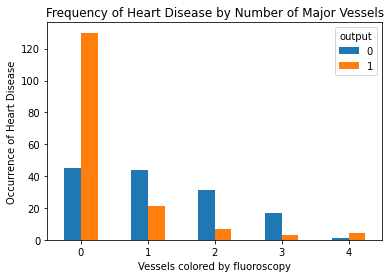

In [29]:
pd.crosstab(data.caa,data.output).plot(kind='bar',rot=0)
plt.title('Frequency of Heart Disease by Number of Major Vessels')
plt.xlabel('Vessels colored by fluoroscopy')
plt.ylabel('Occurrence of Heart Disease')

# more vessels colored by fluoroscopy reduces the chance of heart disease

Text(0, 0.5, 'Occurrence of Heart Disease')

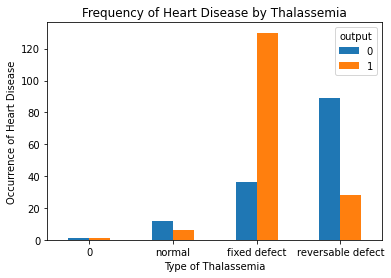

In [30]:
pd.crosstab(data.thall,data.output).plot(kind='bar',rot=0)
plt.title('Frequency of Heart Disease by Thalassemia')
plt.xlabel('Type of Thalassemia')
plt.xticks([0,1,2,3], ['0','normal','fixed defect','reversable defect'])
plt.ylabel('Occurrence of Heart Disease')

# normal presence of thalassemia does not seem to affect heart disease

## Cleaning of data - checking outliers, normalization

In [31]:
target = data.output
target

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [32]:
data = data.drop(columns=['output'])
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [33]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')

In [34]:
# check the number of unique values for each attribute --> check for outliers

for x in data.columns:
    print(x, ": ", data[x].nunique())
    if data[x].nunique()<6:
      print(x, ": ", data[x].unique())
    
# caa has 5 values instead of 4
# thall has 4 values instead of 3

age :  41
sex :  2
sex :  [1 0]
cp :  4
cp :  [3 2 1 0]
trtbps :  49
chol :  152
fbs :  2
fbs :  [1 0]
restecg :  3
restecg :  [0 1 2]
thalachh :  91
exng :  2
exng :  [0 1]
oldpeak :  40
slp :  3
slp :  [0 2 1]
caa :  5
caa :  [0 2 1 3 4]
thall :  4
thall :  [1 2 3 0]


In [35]:
data['caa'].value_counts()
# assumption that there is a typo in classification: adjust 4->3

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64

In [36]:
data['caa'].replace({4:3}, inplace=True)
data['caa'].value_counts() 

0    175
1     65
2     38
3     25
Name: caa, dtype: int64

In [37]:
data['thall'].value_counts() 
# assumption that there is a typo in classification: adjust 1->0, 2->1, 3->1

2    166
3    117
1     18
0      2
Name: thall, dtype: int64

In [38]:
data['thall'].replace({1:0, 2:1, 3:2}, inplace=True)
data['thall'].value_counts() 

1    166
2    117
0     20
Name: thall, dtype: int64

### to check for outliers in the continuous variables

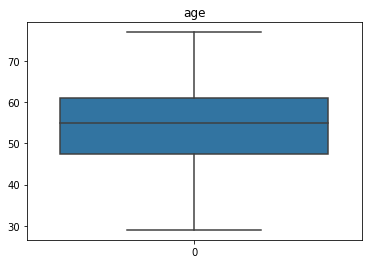

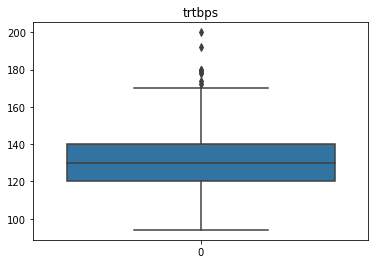

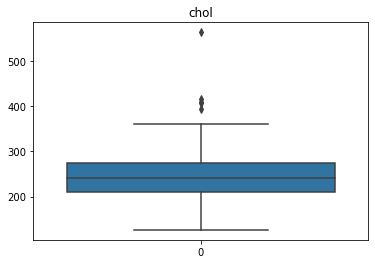

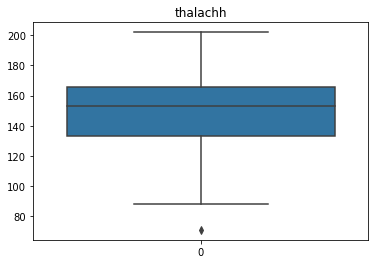

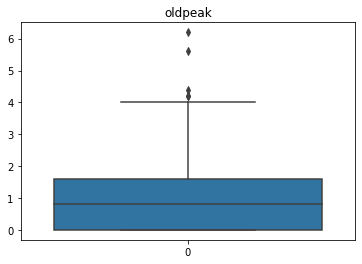

In [39]:
scale_col = []
for x in data.columns:
    if data[x].nunique()>5:
        sns.boxplot(data=data[x]).set_title(x)
        #data.boxplot(vert=False)
        plt.show()
        scale_col.append(x)
    else:
        pass
    
# trtbps, chol, thalachh, oldpeak seem to have outliers

In [40]:
import numpy as np

In [41]:
## trtbps - blood pressure
bp_q1=np.percentile(data.trtbps,25)
bp_q2=np.percentile(data.trtbps,50)
bp_q3=np.percentile(data.trtbps,75)

print(bp_q1, bp_q2, bp_q3)

bp_iqr=bp_q3-bp_q1
print(bp_iqr)

bp_lower=bp_q1-bp_iqr*1.5
bp_upper=bp_q3+bp_iqr*1.5
print(f"BP: Lower range= {bp_lower}, Upper range= {bp_upper}")

for i in data.trtbps:
    if i<bp_lower:
        print(f"{i} is an outlier from lower")
    if i>bp_upper:
        print(f"{i} is an outlier from upper")        

120.0 130.0 140.0
20.0
BP: Lower range= 90.0, Upper range= 170.0
172 is an outlier from upper
178 is an outlier from upper
180 is an outlier from upper
180 is an outlier from upper
200 is an outlier from upper
174 is an outlier from upper
192 is an outlier from upper
178 is an outlier from upper
180 is an outlier from upper


In [42]:
## chol - serum cholesterol
ch_q1=np.percentile(data.chol,25)
ch_q2=np.percentile(data.chol,50)
ch_q3=np.percentile(data.chol,75)

print(ch_q1, ch_q2, ch_q3)

ch_iqr=ch_q3-ch_q1
print(ch_iqr)

ch_lower=ch_q1-ch_iqr*1.5
ch_upper=ch_q3+ch_iqr*1.5
print(f"CH: Lower range= {ch_lower}, Upper range= {ch_upper}")

for i in data.chol:
    if i<ch_lower:
        print(f"{i} is an outlier from lower")
    if i>ch_upper:
        print(f"{i} is an outlier from upper")    

211.0 240.0 274.5
63.5
CH: Lower range= 115.75, Upper range= 369.75
417 is an outlier from upper
564 is an outlier from upper
394 is an outlier from upper
407 is an outlier from upper
409 is an outlier from upper


In [43]:
## thalachh – maximum heart rate achieved
hr_q1=np.percentile(data.thalachh,25)
hr_q2=np.percentile(data.thalachh,50)
hr_q3=np.percentile(data.thalachh,75)

print(hr_q1, hr_q2, hr_q3)

hr_iqr=hr_q3-hr_q1
print(hr_iqr)

hr_lower=hr_q1-hr_iqr*1.5
hr_upper=hr_q3+hr_iqr*1.5
print(f"HR: Lower range= {hr_lower}, Upper range= {hr_upper}")

for i in data.thalachh:
    if i<hr_lower:
        print(f"{i} is an outlier from lower")
    if i>hr_upper:
        print(f"{i} is an outlier from upper")    

133.5 153.0 166.0
32.5
HR: Lower range= 84.75, Upper range= 214.75
71 is an outlier from lower


In [44]:
## oldpeak – ST depression induced by exercise relative to rest
op_q1=np.percentile(data.oldpeak,25)
op_q2=np.percentile(data.oldpeak,50)
op_q3=np.percentile(data.oldpeak,75)

print(op_q1, op_q2, op_q3)

op_iqr=op_q3-op_q1
print(op_iqr)

op_lower=op_q1-op_iqr*1.5
op_upper=op_q3+op_iqr*1.5
print(f"OP: Lower range= {op_lower}, Upper range= {op_upper}")

for i in data.oldpeak:
    if i<op_lower:
        print(f"{i} is an outlier from lower")
    if i>op_upper:
        print(f"{i} is an outlier from upper")    

0.0 0.8 1.6
1.6
OP: Lower range= -2.4000000000000004, Upper range= 4.0
4.2 is an outlier from upper
6.2 is an outlier from upper
5.6 is an outlier from upper
4.2 is an outlier from upper
4.4 is an outlier from upper


### However, for this project, I decided that I will not be handling the outliers, as they are still within realistic ranges for blood pressure, cholesterol, and heart rate (still not too clear what is the attribute oldpeak)

### scaling continuous variables

In [45]:
scale_col

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[scale_col] = scaler.fit_transform(data[scale_col])

data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,0
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,1


### dummy columns for categorical variables

In [47]:
cat_column = []
for x in data.columns:
    if data[x].nunique()<5:
        cat_column.append(x)
        
cat_column

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

In [48]:
data = pd.get_dummies(data, columns=cat_column)

data.head()

,age,trtbps,chol,thalachh,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slp_0,slp_1,slp_2,caa_0,caa_1,caa_2,caa_3,thall_0,thall_1,thall_2
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0


## Model selection

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [50]:
print(data.shape)
print(target.shape)

(303, 28)
(303,)


In [51]:
x_train,x_test,y_train,y_test=train_test_split(data, target, stratify=target, test_size=0.2, random_state=0)

In [52]:
print("data: ", data.shape, "\ntrain: ", x_train.shape, "\ntest: ", x_test.shape)

data:  (303, 28) 
train:  (242, 28) 
test:  (61, 28)


In [53]:
dtc = DecisionTreeClassifier(random_state = 0)
lr = LogisticRegression(random_state=0, max_iter=1000)
knnc = KNeighborsClassifier()
svc = SVC()
nb = GaussianNB()
rf = RandomForestClassifier(random_state=0)

In [54]:
models = [dtc,lr,knnc,svc,nb,rf]
models

[DecisionTreeClassifier(random_state=0),
 LogisticRegression(max_iter=1000, random_state=0),
 KNeighborsClassifier(),
 SVC(),
 GaussianNB(),
 RandomForestClassifier(random_state=0)]

In [55]:
all_dict = dict()
for model in models:
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    acc = accuracy_score(y_test, pred)
    all_dict[str(model)] = acc
    print("\n{} accuracy is {}".format(model, acc))
    
# logistic regression has the highest accuracy


DecisionTreeClassifier(random_state=0) accuracy is 0.7377049180327869

LogisticRegression(max_iter=1000, random_state=0) accuracy is 0.8852459016393442

KNeighborsClassifier() accuracy is 0.8524590163934426

SVC() accuracy is 0.8524590163934426

GaussianNB() accuracy is 0.8524590163934426

RandomForestClassifier(random_state=0) accuracy is 0.8360655737704918


### Testing PCA

In [56]:
from sklearn.decomposition import PCA

In [57]:
d = dict()

for i in range(2, data.shape[1]+1):
    d[i]=PCA(n_components=i)

d

{2: PCA(n_components=2),
 3: PCA(n_components=3),
 4: PCA(n_components=4),
 5: PCA(n_components=5),
 6: PCA(n_components=6),
 7: PCA(n_components=7),
 8: PCA(n_components=8),
 9: PCA(n_components=9),
 10: PCA(n_components=10),
 11: PCA(n_components=11),
 12: PCA(n_components=12),
 13: PCA(n_components=13),
 14: PCA(n_components=14),
 15: PCA(n_components=15),
 16: PCA(n_components=16),
 17: PCA(n_components=17),
 18: PCA(n_components=18),
 19: PCA(n_components=19),
 20: PCA(n_components=20),
 21: PCA(n_components=21),
 22: PCA(n_components=22),
 23: PCA(n_components=23),
 24: PCA(n_components=24),
 25: PCA(n_components=25),
 26: PCA(n_components=26),
 27: PCA(n_components=27),
 28: PCA(n_components=28)}

In [58]:
for i in range(2,data.shape[1]+1):
    
    x_pca=d[i].fit_transform(data)
    
    X_train,X_test,Y_train,Y_test=train_test_split(x_pca,target,test_size=.30,random_state=0)
    rfc=RandomForestClassifier(random_state=42) #to refresh the model
    rfc.fit(X_train,Y_train)
    y_testPCA = rfc.predict(X_test)
    
    print("Accuracy with PCA {} is {} ".format(i,accuracy_score(Y_test,y_testPCA)))
    
# there is no improvement beyond PCA 13

Accuracy with PCA 2 is 0.7912087912087912 
Accuracy with PCA 3 is 0.7252747252747253 
Accuracy with PCA 4 is 0.7692307692307693 
Accuracy with PCA 5 is 0.8351648351648352 
Accuracy with PCA 6 is 0.8131868131868132 
Accuracy with PCA 7 is 0.8021978021978022 
Accuracy with PCA 8 is 0.8351648351648352 
Accuracy with PCA 9 is 0.8241758241758241 
Accuracy with PCA 10 is 0.8351648351648352 
Accuracy with PCA 11 is 0.8021978021978022 
Accuracy with PCA 12 is 0.8241758241758241 
Accuracy with PCA 13 is 0.8461538461538461 
Accuracy with PCA 14 is 0.8351648351648352 
Accuracy with PCA 15 is 0.8461538461538461 
Accuracy with PCA 16 is 0.8351648351648352 
Accuracy with PCA 17 is 0.8131868131868132 
Accuracy with PCA 18 is 0.8351648351648352 
Accuracy with PCA 19 is 0.8351648351648352 
Accuracy with PCA 20 is 0.8131868131868132 
Accuracy with PCA 21 is 0.8351648351648352 
Accuracy with PCA 22 is 0.8461538461538461 
Accuracy with PCA 23 is 0.8351648351648352 
Accuracy with PCA 24 is 0.81318681318681

for i in range(2,data.shape[1]+1):
    
    x_pca=d[i].fit_transform(data)
    
    X_train,X_test,Y_train,Y_test=train_test_split(x_pca,target,test_size=.30,random_state=0)
    lr=LogisticRegression(max_iter=1000, random_state=42) #to refresh the model
    lr.fit(X_train,Y_train)
    y_testPCA = lr.predict(X_test)
    
    print("Accuracy with PCA {} is {} ".format(i,accuracy_score(Y_test,y_testPCA)))

In [59]:
x_pca

array([[ 1.11329340e+00,  3.83193508e-01, -1.25015078e+00, ...,
         3.85395225e-17, -6.89688012e-17,  1.01749094e-16],
       [-1.14427483e+00, -5.73738061e-01, -1.46806319e+00, ...,
         5.72542698e-17, -1.37243137e-18,  1.36155422e-16],
       [-1.72190335e+00, -1.48558258e-01, -8.48320753e-01, ...,
         1.69125808e-17, -7.17506407e-18,  2.13056586e-16],
       ...,
       [ 2.27169512e+00, -7.10078864e-01, -1.36759650e+00, ...,
        -2.04537545e-17,  5.89051766e-17,  2.20578233e-17],
       [ 1.25289269e+00, -2.48507535e+00, -4.33555509e-01, ...,
         8.52352354e-17, -1.19484999e-18, -3.50230112e-18],
       [-8.78896146e-01,  8.25082189e-01,  2.70996263e-01, ...,
        -1.67988928e-17, -3.60955026e-17, -3.97778834e-17]])

In [60]:
pca=PCA(n_components=13)
x_pca13=pca.fit_transform(x_pca)

#pca=PCA(n_components=15)
#x_pca15=pca.fit_transform(x_pca)

In [61]:
X_train,X_test,Y_train,Y_test=train_test_split(x_pca13,target,test_size=.20,random_state=0,stratify=target)

#X_train,X_test,Y_train,Y_test=train_test_split(x_pca15,target,test_size=.20,random_state=0,stratify=target)

In [62]:
# testing the models with PCA 13

all_dict2 = dict()
for model in models:
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(Y_test, pred)
    all_dict2[str(model)] = acc
    print("\n{} accuracy is {}".format(model, acc))
    
# PCA 13 helped to improve the accuracy


DecisionTreeClassifier(random_state=0) accuracy is 0.7213114754098361

LogisticRegression(max_iter=1000, random_state=0) accuracy is 0.9016393442622951

KNeighborsClassifier() accuracy is 0.8524590163934426

SVC() accuracy is 0.8524590163934426

GaussianNB() accuracy is 0.7868852459016393

RandomForestClassifier(random_state=0) accuracy is 0.7704918032786885


In [63]:
lr.fit(X_train, Y_train)
pred = lr.predict(X_test)
print('Accuracy Score : ' + str(accuracy_score(Y_test,pred)))
print('Precision Score : ' + str(precision_score(Y_test,pred)))
print('Recall Score : ' + str(recall_score(Y_test,pred)))
print('F1 Score : ' + str(f1_score(Y_test,pred)))

Accuracy Score : 0.9016393442622951
Precision Score : 0.8857142857142857
Recall Score : 0.9393939393939394
F1 Score : 0.9117647058823529


## Cross-validation

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
accuracy = cross_val_score(lr, x_pca13, target, scoring='accuracy', cv=10)
print(accuracy)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:", accuracy.mean() * 100)

[0.87096774 0.90322581 0.87096774 0.96666667 0.93333333 0.83333333
 0.86666667 0.83333333 0.76666667 0.8       ]
Accuracy of Model with Cross Validation is: 86.45161290322581


## Tuning hyperparameters for logistic regression

In [66]:
lr = LogisticRegression()

In [67]:
param_grid = [
    {'penalty': ['l1','l2','elasticnet','none'],
    'C': np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter': [100,1000,2000,3000,5000]}
]

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
clf = GridSearchCV(lr, param_grid = param_grid, cv=3, verbose = True, n_jobs=-1)

In [70]:
best_clf = clf.fit(data,target)

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 1048 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:    6.4s finished


In [71]:
best_clf.best_estimator_

LogisticRegression(C=0.23357214690901212, penalty='l1', solver='liblinear')

In [72]:
best_clf.best_params_

{'C': 0.23357214690901212,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [73]:
best_clf.best_score_

0.8646864686468647

In [74]:
y_pred_acc = best_clf.predict(x_test)

In [75]:
print('Accuracy Score : ' + str(accuracy_score(Y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(Y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(Y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(Y_test,y_pred_acc)))

Accuracy Score : 0.8852459016393442
Precision Score : 0.8823529411764706
Recall Score : 0.9090909090909091
F1 Score : 0.8955223880597014


## Additional Testing - Boosting Models

In [76]:
from xgboost import XGBClassifier #pip install xgboost
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier

In [77]:
bc = BaggingClassifier() #base_estimator=None
# you can define: (base_estimator=SVC(),n_estimators=10,random_state=0).fit(X,y)
# same for others

ada = AdaBoostClassifier() #base_estimator=None
gbc = GradientBoostingClassifier()
xg = XGBClassifier(random_state=0,use_label_encoder=False)

In [78]:
model=[bc,ada,gbc,xg]

In [79]:
boost_dict = dict()
for mod in model:
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc = accuracy_score(y_test, pred)
    all_dict[str(mod)] = acc
    print("\n{} accuracy is {}".format(str(mod), acc))


BaggingClassifier() accuracy is 0.7704918032786885

AdaBoostClassifier() accuracy is 0.8032786885245902

GradientBoostingClassifier() accuracy is 0.8524590163934426
[18:25:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
            

## ROC curve for the best model result

In [80]:
lr.fit(X_train,Y_train)

LogisticRegression()

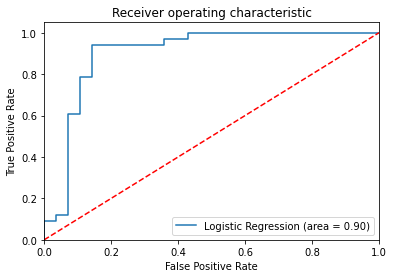

In [81]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

[[24  4]
 [ 4 29]]


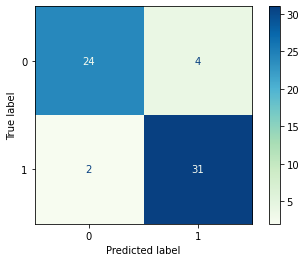

In [82]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
print(confusion_matrix(Y_test, pred))

plot_confusion_matrix(lr, X_test, Y_test, cmap='GnBu')
plt.show()

## END~